## Importing Libraries

In [1]:
import os
import wget
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku 

from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

## Loading Data

In [ ]:
path = os.getcwd()+"\..\data\sonnets.txt"
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt"
wget.download(url, out = path)

## Tokenizing and Padding

In [2]:
data = open('../data/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

## Defining Predictors and Labels

In [4]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

## Building a Model

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [6]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 45s 92ms/step - loss: 6.9212 - accuracy: 0.0211
Epoch 2/100
484/484 [==============================] - 45s 93ms/step - loss: 6.5209 - accuracy: 0.0225
Epoch 3/100
484/484 [==============================] - 44s 91ms/step - loss: 6.4068 - accuracy: 0.0246
Epoch 4/100
484/484 [==============================] - 44s 92ms/step - loss: 6.3118 - accuracy: 0.0296
Epoch 5/100
484/484 [==============================] - 45s 94ms/step - loss: 6.2257 - accuracy: 0.0358
Epoch 6/100
484/484 [==============================] - 46s 95ms/step - loss: 6.1464 - accuracy: 0.0397
Epoch 7/100
484/484 [==============================] - 49s 101ms/step - loss: 6.0664 - accuracy: 0.0406s - loss: 6.0623  - ETA: 1s - loss: 6 - ETA: 0s - loss: 6.0661 - accura
Epoch 8/100
484/484 [==============================] - 44s 91ms/step - loss: 5.9663 - accuracy: 0.0438
Epoch 9/100
484/484 [==============================] - 44s 90ms/step - loss: 5.8669 - accuracy: 0.0485
E

484/484 [==============================] - 47s 97ms/step - loss: 1.6688 - accuracy: 0.69870s - loss: 1.6667 - ac
Epoch 79/100
484/484 [==============================] - 48s 99ms/step - loss: 1.6391 - accuracy: 0.7121
Epoch 80/100
484/484 [==============================] - 45s 94ms/step - loss: 1.6231 - accuracy: 0.7133
Epoch 81/100
484/484 [==============================] - 55s 113ms/step - loss: 1.6061 - accuracy: 0.7143s - loss: 1.6027 - 
Epoch 82/100
484/484 [==============================] - 67s 138ms/step - loss: 1.5878 - accuracy: 0.7171
Epoch 83/100
484/484 [==============================] - 47s 97ms/step - loss: 1.5521 - accuracy: 0.7284
Epoch 84/100
484/484 [==============================] - 50s 104ms/step - loss: 1.5325 - accuracy: 0.7309s - l
Epoch 85/100
484/484 [==============================] - 48s 99ms/step - loss: 1.5247 - accuracy: 0.7340
Epoch 86/100
484/484 [==============================] - 47s 96ms/step - loss: 1.5133 - accuracy: 0.7347
Epoch 87/100
484/484 [======

## Visualising Accuracy and Loss

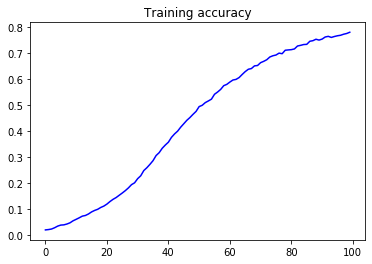

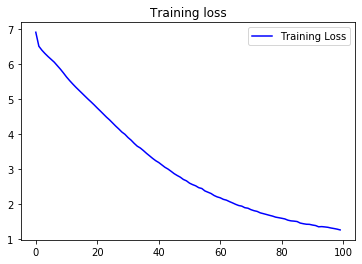

In [7]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Testing

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print('----Predicted Poem---- \n',seed_text)

----Predicted Poem---- 
 Help me Obi Wan Kenobi, you're my only hope and heart tend aside you dearer eye shown green in men go days chide thee alone away have summer's tomb me view well brought of eyes staineth staineth staineth brought of riper days alone seen chide die blind alone shown lies live aside rare ' make mine eye had view ' now wealth more short ill living admire ill esteem'd shows me up torn prove vassalage die lies prove dwell my cross clearer shaken ' alone did prove old crime on thee slain alone more still still lie on in thee in good pride lies bear all too sort twain
